## Imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import time
from numba import njit

## Numba accelerator

In [69]:
nu=1
def solve_1d_diff(u, un, nt, nx, dt, dx, nu):
    for n in range(nt):  #iterate through time
        for i in range(nx):
            un[i] = u[i] ##copy the existing values of u into un
        for i in range(1, nx-1): #iterate through the nbr of x values 
            u[i] = un[i] +  (nu*dt /(dx**2)) * (un[i+1] - 2*un[i]+un[i-1])   
    return 0

## Inputs

In [70]:
nx = 501
dx = 2 / (nx - 1)
nt = 3500    #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
CFL = .5 #sigma is a parameter, we'll learn more about it later
dt = CFL * dx**2 / nu #dt is defined using sigma ... more later!

### Initialisation

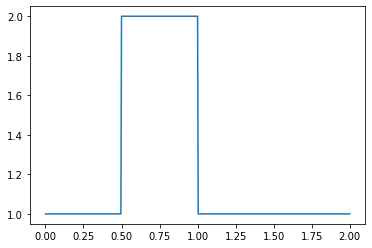

In [71]:
grid = np.linspace(0,2,nx) # creating the space grid
u0 = np.ones(nx)      #a numpy array with nx elements all equal to 1.
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0);
u = u0.copy()
un = np.ones(nx) #our placeholder array, un, to advance the solution in time

### Call the function to resolve the equation


In [ ]:
solve_1d_diff(u, un, nt, nx, dt, dx, nu)

### Plotting data

- Expected output:
![diffusion](../data/diffusion.png)

In [ ]:
plt.plot(grid,u0)
plt.plot(grid,u, color='orange')
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('X') 

## Call Funtions using timeit

### Pure function

In [14]:
%timeit solve_1d_diff(u, un, nt, nx, dt, dx, nu)

### Function with numba accelerator

In [ ]:
@njit(fastmath=True)
def solve_1d_diff_numba(u, un, nt, nx, dt, dx, nu):
    for n in range(nt):  #iterate through time
        for i in range(nx):
            un[i] = u[i] ##copy the existing values of u into un
            for i in range(1, nx-1): #iterate through the nbr of x values 
                u[i] = un[i] +  (nu*dt /(dx**2)) * (un[i+1] - 2*un[i]+un[i-1])   
    return 0

In [ ]:
%timeit solve_1d_diff_numpy(u, un, nt, nx, dt, dx, nu)